In [1]:

from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [2]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("covid_19_clean_complete.csv", delimiter=",")
df.groupby(['Country/Region']).sum()
a = df['Country/Region']
print(a)
df.groupby(['Confirmed']).sum()
b = df['Confirmed']
print(b)
# date = [elem for elem in df['Date']]
# values = [elem for elem in df['Confirmed']]
# plt.xticks(range(0,len(date)),rotation=45)
# plt.plot(country, values)
df = pd.read_csv("covid_19_clean_complete.csv")
df.tail(5)

0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
32060    Sao Tome and Principe
32061                    Yemen
32062                  Comoros
32063               Tajikistan
32064                  Lesotho
Name: Country/Region, Length: 32065, dtype: object
0           0
1           0
2           0
3           0
4           0
         ... 
32060     251
32061     197
32062      34
32063    2350
32064       1
Name: Confirmed, Length: 32065, dtype: int64


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0
32064,NaN,Lesotho,-29.609988,28.233608,5/21/20,1,0,0


In [0]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='Deaths'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Deaths']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='Deaths'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Deaths']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case], label='DeathCases')
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    #plt.plot('Confirmed', label='First Line')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

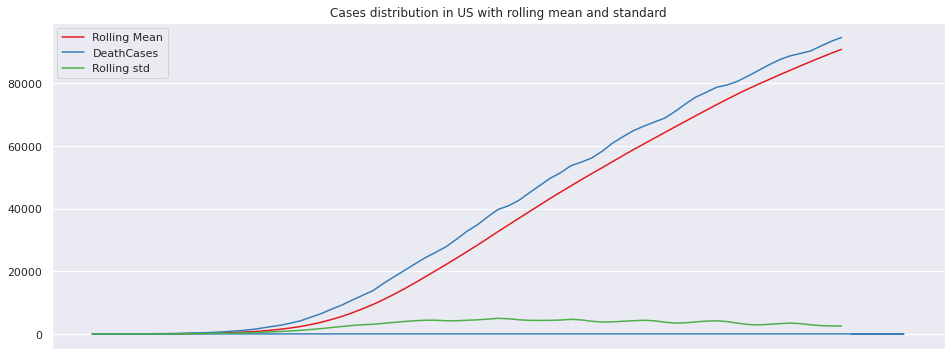

In [5]:
tsC1=roll('US')
rollPlot('US')

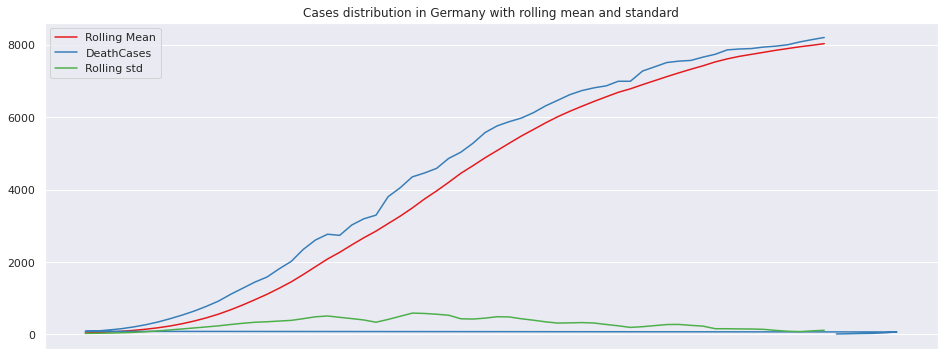

In [6]:
tsC2=roll('Germany')
rollPlot('Germany')

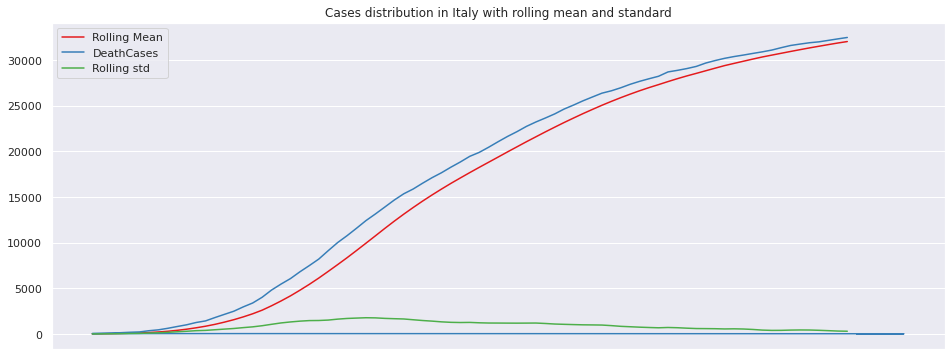

In [7]:
tsC3=roll('Italy')
rollPlot('Italy')

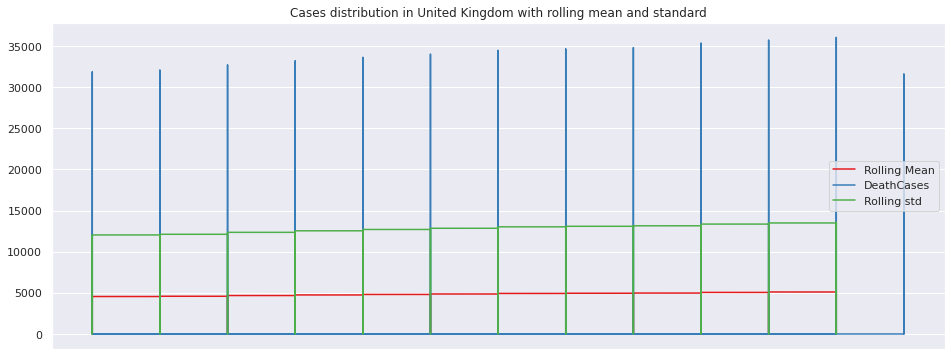

In [8]:
tsC4=roll('United Kingdom')
rollPlot('United Kingdom')

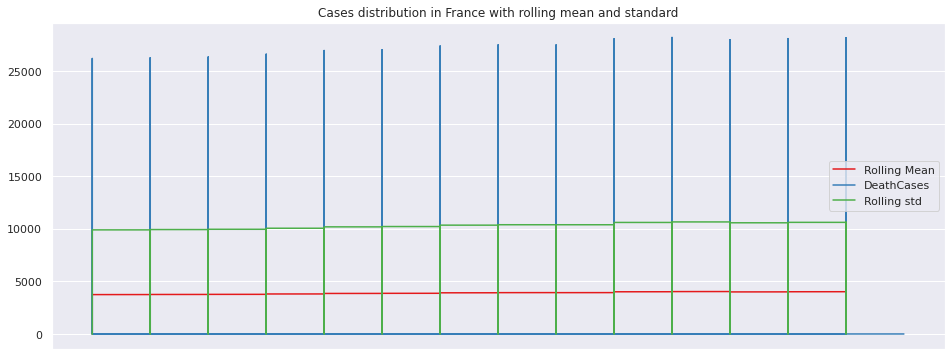

In [9]:
tsC5=roll('France')
rollPlot('France')

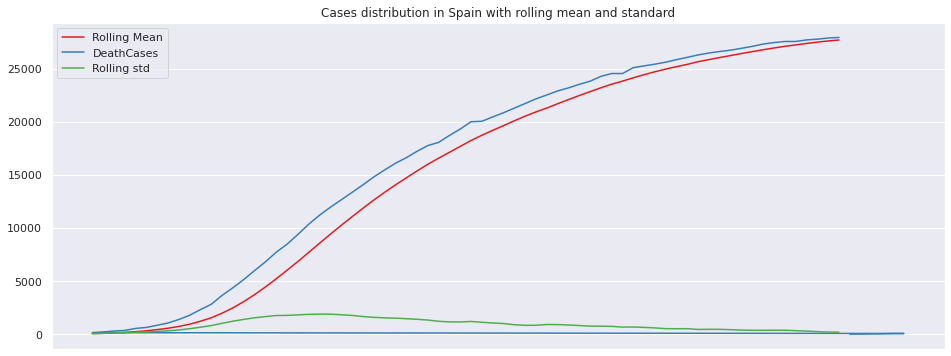

In [10]:
tsC6=roll('Spain')
rollPlot('Spain')

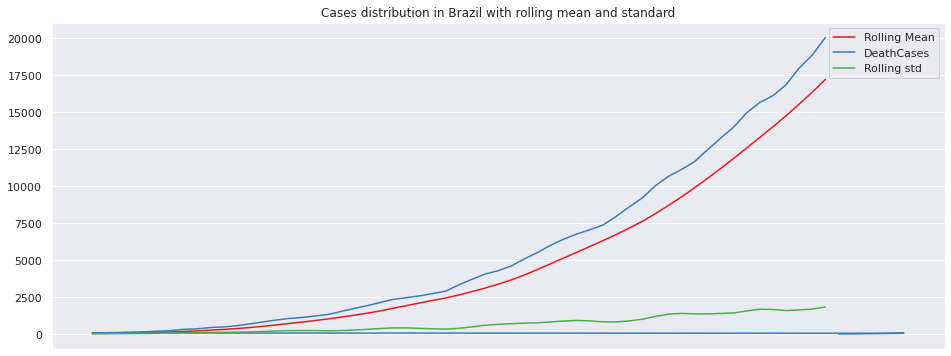

In [11]:
tsC7=roll('Brazil')
rollPlot('Brazil')

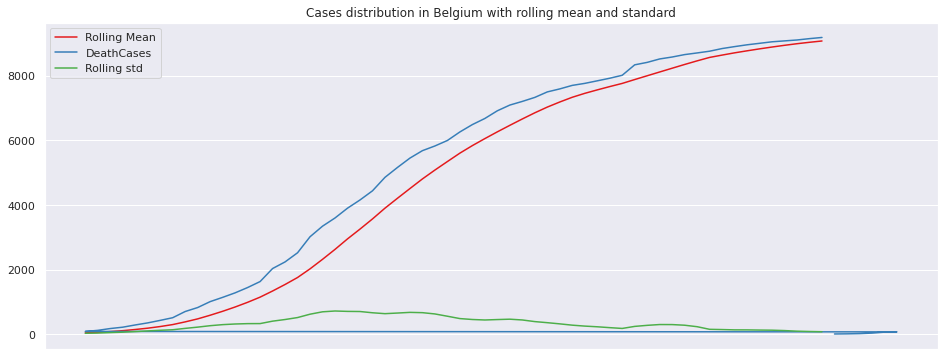

In [12]:
tsC8=roll('Belgium')
rollPlot('Belgium')

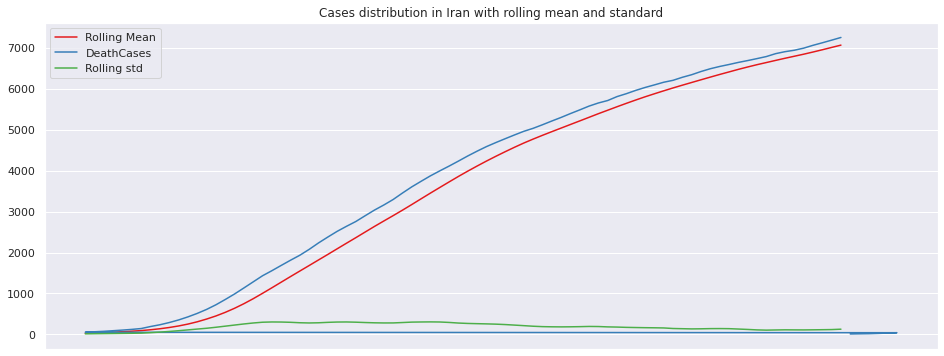

In [13]:
tsC9=roll('Iran')
rollPlot('Iran')

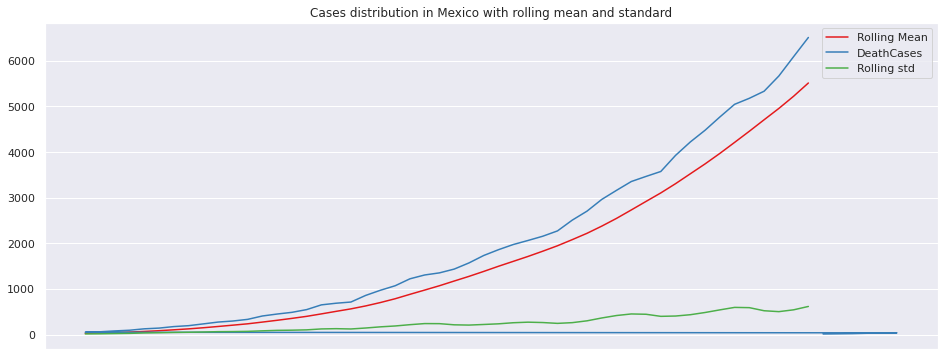

In [14]:
tsC10=roll('Mexico')
rollPlot('Mexico')

In [15]:
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For US
tsC=tsC1['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  0.017069
p-value                         0.959921
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [16]:
#For Germany
tsC=tsC2['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -4.526805
p-value                         0.000176
#Lags Used                      5.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [17]:
#For Italy
tsC=tsC3['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.329915
p-value                         0.162501
#Lags Used                      9.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [18]:
#For UK
tsC=tsC4['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  -0.690868
p-value                          0.849101
#Lags Used                      13.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64


In [19]:
#For France
tsC=tsC5['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  -1.015867
p-value                          0.747433
#Lags Used                      14.000000
Number of Observations Used    137.000000
Critical Value (1%)             -3.479007
Critical Value (5%)             -2.882878
Critical Value (10%)            -2.578149
dtype: float64


In [20]:
#For Spain
tsC=tsC6['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -3.375480
p-value                         0.011824
#Lags Used                      8.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [21]:
#For Brazil
tsC=tsC7['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -0.589711
p-value                         0.873290
#Lags Used                     10.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [22]:
#For Belgium
tsC=tsC8['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.601316
p-value                         0.092726
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [23]:
#For Iran
tsC=tsC9['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.528980
p-value                         0.108581
#Lags Used                     10.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [24]:
#For Mexico
tsC=tsC10['Deaths'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  1.562063
p-value                         0.997739
#Lags Used                      8.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
